<a href="https://colab.research.google.com/github/shankha2018/Consensus-and-Ensemble-Model/blob/main/classifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classification

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the Dataset

In [2]:
datasetUrl = 'https://raw.githubusercontent.com/SohelRaja/Consensus-and-Ensemble-Model/main/Datasets/colon.csv'

In [3]:
colon = pd.read_csv(datasetUrl)

In [4]:
colon.head(5)

,Unnamed: 0,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,1,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,2598.0600,1522.6462,1300.5988,1181.6300,2417.95830,3139.4000,2473.2612,1306.9038,1285.6025,1900.3613,3504.2139,2428.0525,5150.0137,3855.8400,1806.4750,3192.4130,872.0143,1135.82390,2365.2424,1567.2363,1643.5575,1582.03500,2854.9875,2513.3350,930.0712,3166.5800,930.3038,2018.3550,2065.5945,...,135.19624,98.47250,74.65250,46.80125,75.626190,228.42250,77.22375,47.94625,34.68750,225.91500,243.41250,35.825000,177.23810,64.71125,88.44444,107.83375,42.16750,47.62125,163.80125,86.000000,69.35250,90.344444,58.44750,52.86625,12.202632,20.689285,86.81000,51.46000,289.42374,99.11072,67.56125,259.91250,138.89874,88.23250,39.66786,67.82875,75.67750,83.52250,28.70125,Abnormal
1,2,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,1672.9750,1792.1769,3792.5425,3630.3826,1906.21310,5745.3960,1919.4462,2036.2838,2253.3625,2490.8738,3759.5850,4268.9185,4166.1914,4286.6900,2699.2844,2796.0833,1015.9143,1459.10250,2865.0388,1156.9563,1351.9650,3218.32130,3855.5337,3097.4539,1667.5425,2779.3037,1064.2675,2430.8790,2814.2800,...,169.08000,76.40750,119.05750,62.59750,81.463100,1803.76370,100.05250,101.37625,61.82250,330.16125,202.20500,37.129760,605.53810,91.29500,86.03611,48.45875,37.41750,86.38625,163.13875,146.125000,89.59000,124.708330,35.79375,62.05875,39.719738,83.142860,321.33750,41.59125,263.36874,126.78929,92.23875,96.27625,150.59000,82.23750,85.03333,152.19500,186.56750,44.47250,16.77375,Normal
2,3,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,2441.4187,1487.6711,1315.8538,855.4550,802.30475,3251.1084,781.9950,1618.6500,1066.8387,1006.2112,1436.7850,658.8787,1924.7913,2080.6611,1155.9438,1444.0964,853.4429,734.52875,763.3075,704.1175,591.8088,807.39374,2138.8726,1734.1150,905.6200,1378.1200,797.1925,1880.1875,1389.6302,...,62.98000,51.04375,104.76250,10.15750,47.025000,460.56750,64.46125,159.98000,99.53250,122.04250,97.26750,23.496430,119.11190,75.15500,122.41389,40.46750,6.15625,10.62375,128.99374,24.917105,77.06375,33.443054,14.43625,30.18500,24.805264,6.016071,116.18375,50.87375,71.40125,151.87738,82.71500,31.10250,193.92000,76.97250,224.62024,31.22500,42.65625,16.09250,15.15625,Abnormal
3,4,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,1723.5800,1298.7250,1309.3475,1789.6700,1587.79170,3496.1458,1226.2975,1597.2812,1144.6912,1139.6274,2662.0974,2636.1562,3134.7476,4244.0700,1186.8938,2342.3820,792.2143,1133.23750,969.8237,835.3862,1392.7162,3034.57130,4699.3950,3312.4812,854.4288,1880.5400,1329.3225,3124.2488,2456.0930,...,61.42375,97.97375,34.58875,63.75875,45.223810,799.94500,71.27625,24.16875,40.38625,198.43500,170.53876,16.402382,172.44524,90.45500,140.83057,31.11625,21.02875,70.51875,203.06375,174.063160,86.48125,76.851390,38.58875,10.61125,35.985527,43.935715,239.27000,29.55875,367.58124,152.59525,41.68375,5.92500,183.00626,74.52875,67.71072,48.33875,42.52000,49.98250,16.08500,Normal
4,5,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,2724.2660,2557.7847,3164.6963,2285.3088,2576.74880,3056.7250,1391.5900,2162.5537,1540.2500,2705.6750,1271.7188,4439.8910,2030.6738,2249.8188,2150.1218,3350.5024,1563.9893,1903.58250,1568.1113,1368.8175,2648.2676,1073.41000,1207.41

### Data Analysis

In [5]:
colon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 2002 entries, Unnamed: 0 to Class
dtypes: float64(2000), int64(1), object(1)
memory usage: 969.8+ KB


In [6]:
colon_arr = np.array(colon.columns)
def unique_value_check():
    len_col = len(colon_arr)
    print("Column Name : No. of unique value")
    print("---------------------------------")
    for i in range(len_col):
        val = len(np.unique(colon[colon_arr[i]]))
        if val != 62:
            print(i," : ",colon_arr[i],":",val,end='\t')
            if(val<10):
                print("---> ",colon[colon_arr[i]].unique().tolist())
            else:
                print("---> [Too Much Values]")
print(unique_value_check())
colon_arr

Column Name : No. of unique value
---------------------------------
870  :  M16827 : 61	---> [Too Much Values]
1022  :  R38513_ : 61	---> [Too Much Values]
1077  :  R55778 : 61	---> [Too Much Values]
1129  :  T55840 : 61	---> [Too Much Values]
1158  :  T89175 : 61	---> [Too Much Values]
1179  :  U20285 : 61	---> [Too Much Values]
1358  :  U02081 : 61	---> [Too Much Values]
1404  :  M14676 : 61	---> [Too Much Values]
1474  :  L26050_ : 61	---> [Too Much Values]
1521  :  U07139 : 61	---> [Too Much Values]
1524  :  T47719 : 61	---> [Too Much Values]
1531  :  M34344 : 61	---> [Too Much Values]
1701  :  H62466 : 61	---> [Too Much Values]
1740  :  M81651 : 61	---> [Too Much Values]
1771  :  J05032 : 61	---> [Too Much Values]
1864  :  T91121 : 61	---> [Too Much Values]
1947  :  R44112 : 61	---> [Too Much Values]
1984  :  U12140 : 61	---> [Too Much Values]
2001  :  Class : 2	--->  ['Abnormal', 'Normal']
None


array(['Unnamed: 0', 'H55933', 'R39465', ..., 'R77780', 'T49647', 'Class'],
      dtype=object)

In [7]:
colon.describe()

,Unnamed: 0,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,H77510,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,7015.786703,4966.959971,4094.727906,3987.789302,2937.126132,4705.119294,3588.800302,2872.288627,4680.191126,4039.661958,3399.386232,2283.847035,3064.709573,3169.054361,3087.897071,4342.216085,2906.718926,2275.056023,2516.240561,2920.266588,3198.948548,4672.716847,3544.121735,3243.616007,2146.440465,4441.338633,1319.834292,2620.612727,2398.687153,2416.720414,2728.851989,1829.040311,3132.103775,1951.479187,1326.721536,2320.837516,2239.639920,1594.724263,2306.324157,...,78.244234,81.977560,223.428349,68.373891,57.369234,72.967761,463.727180,82.297017,128.950785,60.494657,271.628951,203.333509,41.380875,248.155971,79.882218,183.262590,103.252299,90.263649,71.159980,208.169699,90.730603,49.362177,112.489315,49.123790,55.558851,72.746414,61.462875,219.899538,65.092621,186.239012,186.204532,100.227903,293.222722,124.653387,133.186935,184.136636,84.118387,114.930000,53.251230,42.965827
std,18.041619,3092.970593,2188.890465,1818.080945,2019.086906,1356.932895,2400.848121,1872.106074,1122.365445,2417.239210,2018.044259,1841.232524,805.367040,1752.976635,1629.209786,1531.673225,2091.829860,1597.413732,954.275623,1455.282461,1646.820322,1657.661682,2202.233176,2012.013956,1923.390782,845.154632,2486.862067,521.621695,1314.871487,1332.286091,1236.560380,1708.641893,844.895807,1771.742108,877.221537,594.530875,1324.342855,1261.389033,795.542247,1330.420236,...,55.980613,52.123156,384.934640,38.273377,44.448600,55.354463,479.368497,48.883995,147.003258,51.905583,163.084930,146.025051,24.685863,325.837881,53.547760,201.103915,66.941879,99.478449,41.911208,136.261553,67.567683,27.559189,95.161307,23.945443,46.316973,54.988725,52.075881,200.746139,42.511124,116.216778,117.605889,78.022713,179.249194,75.535838,101.372557,159.914871,86.182028,88.011866,38.462814,28.395175
min,1.000000,1914.677500,1383.488600,1269.648700,1186.030400,1166.553600,1087.750000,1062.697500,1026.477500,995.790000,974.815500,967.785000,962.561500,886.018740,855.455000,802.304750,758.529200,745.535000,736.873800,716.773740,672.956240,666.181300,658.878700,607.091250,606.788760,601.550000,590.352360,569.736900,568.015000,566.867500,561.336240,538.690000,524.087500,502.191250,473.665000,461.221250,460.318760,439.676240,422.656250,408.691830,...,6.427500,6.416250,6.382500,6.370000,6.361250,6.330952,6.317500,6.298750,6.296250,6.295000,6.271250,6.261250,6.259524,6.253571,6.220000,6.191667,6.161250,6.156250,6.136250,6.121250,6.088158,6.081250,6.072222,6.068750,6.068750,6.032895,6.016071,6.010000,5.967500,5.960000,5.950000,5.935000,5.925000,5.923750,5.916250,5.888095,5.878750,5.848750,5.842500,5.816250
25%

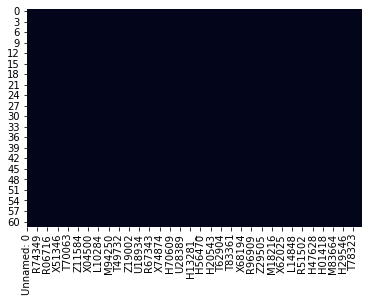

In [8]:
sns.heatmap(colon.isnull(),cbar=False)

In [9]:
df = colon.drop(columns=['Unnamed: 0'],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 2001 entries, H55933 to Class
dtypes: float64(2000), object(1)
memory usage: 969.4+ KB


In [11]:
df = colon.drop(columns=['Unnamed: 0'],axis=1)

In [12]:
df.head()


,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,control2,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,2598.0600,1522.6462,1300.5988,1181.6300,2417.95830,3139.4000,2473.2612,1306.9038,1285.6025,1900.3613,3504.2139,2428.0525,5150.0137,3855.8400,1806.4750,3192.4130,872.0143,1135.82390,2365.2424,1567.2363,1643.5575,1582.03500,2854.9875,2513.3350,930.0712,3166.5800,930.3038,2018.3550,2065.5945,2065.5945,...,135.19624,98.47250,74.65250,46.80125,75.626190,228.42250,77.22375,47.94625,34.68750,225.91500,243.41250,35.825000,177.23810,64.71125,88.44444,107.83375,42.16750,47.62125,163.80125,86.000000,69.35250,90.344444,58.44750,52.86625,12.202632,20.689285,86.81000,51.46000,289.42374,99.11072,67.56125,259.91250,138.89874,88.23250,39.66786,67.82875,75.67750,83.52250,28.70125,Abnormal
1,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,1672.9750,1792.1769,3792.5425,3630.3826,1906.21310,5745.3960,1919.4462,2036.2838,2253.3625,2490.8738,3759.5850,4268.9185,4166.1914,4286.6900,2699.2844,2796.0833,1015.9143,1459.10250,2865.0388,1156.9563,1351.9650,3218.32130,3855.5337,3097.4539,1667.5425,2779.3037,1064.2675,2430.8790,2814.2800,2814.2800,...,169.08000,76.40750,119.05750,62.59750,81.463100,1803.76370,100.05250,101.37625,61.82250,330.16125,202.20500,37.129760,605.53810,91.29500,86.03611,48.45875,37.41750,86.38625,163.13875,146.125000,89.59000,124.708330,35.79375,62.05875,39.719738,83.142860,321.33750,41.59125,263.36874,126.78929,92.23875,96.27625,150.59000,82.23750,85.03333,152.19500,186.56750,44.47250,16.77375,Normal
2,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,2441.4187,1487.6711,1315.8538,855.4550,802.30475,3251.1084,781.9950,1618.6500,1066.8387,1006.2112,1436.7850,658.8787,1924.7913,2080.6611,1155.9438,1444.0964,853.4429,734.52875,763.3075,704.1175,591.8088,807.39374,2138.8726,1734.1150,905.6200,1378.1200,797.1925,1880.1875,1389.6302,1389.6302,...,62.98000,51.04375,104.76250,10.15750,47.025000,460.56750,64.46125,159.98000,99.53250,122.04250,97.26750,23.496430,119.11190,75.15500,122.41389,40.46750,6.15625,10.62375,128.99374,24.917105,77.06375,33.443054,14.43625,30.18500,24.805264,6.016071,116.18375,50.87375,71.40125,151.87738,82.71500,31.10250,193.92000,76.97250,224.62024,31.22500,42.65625,16.09250,15.15625,Abnormal
3,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,1723.5800,1298.7250,1309.3475,1789.6700,1587.79170,3496.1458,1226.2975,1597.2812,1144.6912,1139.6274,2662.0974,2636.1562,3134.7476,4244.0700,1186.8938,2342.3820,792.2143,1133.23750,969.8237,835.3862,1392.7162,3034.57130,4699.3950,3312.4812,854.4288,1880.5400,1329.3225,3124.2488,2456.0930,2456.0930,...,61.42375,97.97375,34.58875,63.75875,45.223810,799.94500,71.27625,24.16875,40.38625,198.43500,170.53876,16.402382,172.44524,90.45500,140.83057,31.11625,21.02875,70.51875,203.06375,174.063160,86.48125,76.851390,38.58875,10.61125,35.985527,43.935715,239.27000,29.55875,367.58124,152.59525,41.68375,5.92500,183.00626,74.52875,67.71072,48.33875,42.52000,49.98250,16.08500,Normal
4,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,2724.2660,2557.7847,3164.6963,2285.3088,2576.74880,3056.7250,1391.5900,2162.5537,1540.2500,2705.6750,1271.7188,4439.8910,2030.6738,2249.8188,2150.1218,3350.5024,1563.9893,1903.58250,1568.1113,1368.8175,

In [13]:
X = df.drop(['Class'],axis=1)
y = df['Class']

### Taking Dummy Values

In [14]:
Y = pd.get_dummies(y,drop_first=True)
Y.head()

,Normal
0,0
1,1
2,0
3,1
4,0


### Spliting of Training and testing dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

### KNN Classification

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [18]:
K = 15
acc = np.zeros((K-1))
for k in range(1,K):
  clf_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
  y_pred_knn = clf_knn.predict(X_test)
  acc[k-1] = metrics.accuracy_score(y_test,y_pred_knn)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [21]:
print("The Best Accuracy is:",acc.max()*100,"% with k=",acc.argmax()+1)

The Best Accuracy is: 92.3076923076923 % with k= 5


In [22]:
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred_knn))

Accuracy :  0.9230769230769231


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [23]:
print("Train Accuracy :", knn_model.score(X_train, y_train), "Testing Accuracy :", knn_model.score(X_test, y_test))

Train Accuracy : 0.8571428571428571 Testing Accuracy : 0.9230769230769231


In [24]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred_knn, average='macro'))
print(precision_score(y_test, y_pred_knn, average='micro'))
print(precision_score(y_test, y_pred_knn, average='weighted'))

0.9
0.9230769230769231
0.9384615384615385


### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf_logreg = LogisticRegression(max_iter=50, verbose=1, random_state=101)

In [27]:
clf_logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [28]:
y_pred_logreg = clf_logreg.predict(X_test)

In [30]:
print('Accuracy of logistic regression classifier on test set:{:.2f}'.format(clf_logreg.score(X_test,y_test)*100))

Accuracy of logistic regression classifier on test set:61.54


In [31]:
print("Train Accuracy :", clf_logreg.score(X_train,y_train), "Testing Accuracy :", clf_logreg.score(X_test, y_test))

Train Accuracy : 1.0 Testing Accuracy : 0.6153846153846154


In [32]:
print(precision_score(y_test, y_pred_logreg, average='macro'))
print(precision_score(y_test, y_pred_logreg, average='micro'))
print(precision_score(y_test, y_pred_logreg, average='weighted'))

0.6309523809523809
0.6153846153846154
0.7087912087912087


### Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_pred_gnb = clf_gnb.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
print("Accuracy ",metrics.accuracy_score(y_test,y_pred_gnb)*100)

Accuracy  46.15384615384615


In [36]:
print("Train Accuracy :", clf_gnb.score(X_train,y_train), "Testing Accuracy :",clf_gnb.score(X_test,y_test))

Train Accuracy : 0.6530612244897959 Testing Accuracy : 0.46153846153846156


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_gnb)
print(confusion_matrix)

[[2 7]
 [0 4]]


### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf_dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf_dt_entropy.fit(X_train,y_train)
y_pred = clf_dt_entropy.predict(X_test)
dt_accuracy = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print('Accuracy(Decision Tree): ',dt_accuracy,'%')
print("Train Accuracy :", clf_dt_entropy.score(X_train,y_train), "Testing Accuracy :", clf_dt_entropy.score(X_test, y_test))

Accuracy(Decision Tree):  46.15 %
Train Accuracy : 1.0 Testing Accuracy : 0.46153846153846156


### SVM

In [39]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train,y_train)
y_pred = clf_svm.predict(X_test)
svm_accuracy = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print('Accuracy(SVM): ',svm_accuracy,'%')
print("Train Accuracy :", clf_svm.score(X_train, y_train), "Testing Accuracy :", clf_svm.score(X_test, y_test))

Accuracy(SVM):  92.31 %
Train Accuracy : 0.8979591836734694 Testing Accuracy : 0.9230769230769231


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Bagging Approach

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

In [43]:
n_estimators = [2, 4, 8, 16, 32, 64, 100, 200, 300, 400, 500]
train_result_rf = []
test_result_rf = []

#### Random Forest with gini criterion 

In [44]:
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, criterion='gini')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result_rf.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result_rf.append(roc_auc)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

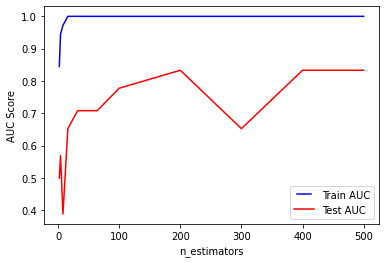

In [45]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_result_rf, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_result_rf, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()

In [46]:
n_estimators = [50, 55, 60, 65, 70, 75, 80]
train_result_rf = []
test_result_rf = []

In [47]:
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, criterion='gini')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result_rf.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result_rf.append(roc_auc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

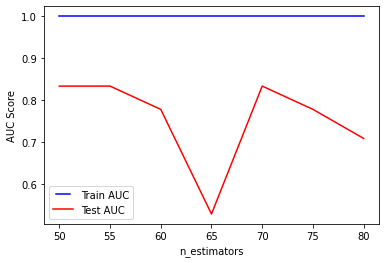

In [48]:
line1, = plt.plot(n_estimators, train_result_rf, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_result_rf, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()

In [49]:
rf = RandomForestClassifier(n_estimators = 60)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy(Random Forest): ',rf_accuracy,'%')

Accuracy(Random Forest):  61.54 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


#### Random Forest with entropy criterion

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConv

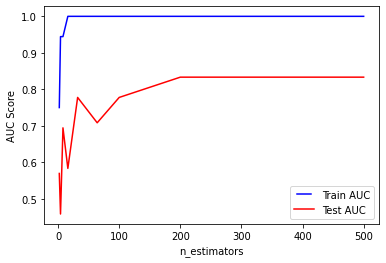

In [50]:
n_estimators = [2, 4, 8, 16, 32, 64, 100, 200, 300, 400, 500]
train_result_rf = []
test_result_rf = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, criterion='entropy')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result_rf.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result_rf.append(roc_auc)

line1, = plt.plot(n_estimators, train_result_rf, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_result_rf, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConv

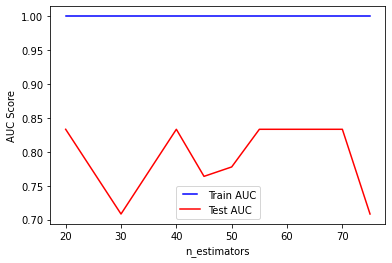

In [51]:
n_estimators = [20, 30, 40, 45, 50, 55, 60, 65, 70, 75]
train_result_rf = []
test_result_rf = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, criterion='entropy')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result_rf.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result_rf.append(roc_auc)

line1, = plt.plot(n_estimators, train_result_rf, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_result_rf, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()

In [52]:
rf = RandomForestClassifier(n_estimators=50, criterion='entropy')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy(Random Forest): ',rf_accuracy,'%')

Accuracy(Random Forest):  53.85 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [53]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(kernel="linear", C=1000)
nb_clf = GaussianNB()
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=2)
knn_clf = KNeighborsClassifier(n_neighbors=38)

voting_clf = VotingClassifier(
	estimators = [('lr', log_clf), ('rf', rnd_clf), ('knn',knn_clf),('dt',dt_clf),('nb', nb_clf)])    
voting_clf.fit(X_train, y_train)
y_pred=voting_clf.predict(X_test)

vot_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print('\n\nAccuracy(Voting Classifier) for Training Dataset :', voting_clf.score(X_train, y_train)*100, "%, ",'Accuracy(Voting Classifier) for Testing Dataset: ',vot_accuracy,'%')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Accuracy(Voting Classifier) for Training Dataset : 100.0 %,  Accuracy(Voting Classifier) for Testing Dataset:  61.54 %


In [54]:
from sklearn.ensemble import BaggingClassifier

### Bagging (KNeighborsClassifier)

In [103]:
bg = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5,max_features=1.0,n_estimators=50)
bg.fit(X_train,y_train)
print(bg.score(X_train, y_train),bg.score(X_test,y_test))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7551020408163265 0.9230769230769231


Bagging (Decision Tree)

In [104]:
bg = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=50)
bg.fit(X_train,y_train)
print(bg.score(X_train, y_train),bg.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9795918367346939 0.7692307692307693


###Bagging(LogisticRegression)

In [105]:
bg = BaggingClassifier(LogisticRegression(),max_samples=0.5,max_features=1.0,n_estimators=20)
bg.fit(X_train,y_train)
print(bg.score(X_train, y_train),bg.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9183673469387755 0.8461538461538461


### Bagging (SVM)

In [69]:
bg = BaggingClassifier(svm.SVC(),max_samples=0.5,max_features=1.0,n_estimators=30)
bg.fit(X_train,y_train)
print(bg.score(X_train, y_train),bg.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7551020408163265 0.8461538461538461


In [70]:
from sklearn.ensemble import  AdaBoostClassifier

####AdaBoosting (DecisionTree)

In [71]:
adb =AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5,learning_rate=1)
adb.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [73]:
adb.score(X_test,y_test)

0.5384615384615384

In [74]:
adb.score(X_train,y_train)

1.0

####AdaBoost(Logistic Regression)

In [107]:
adb =AdaBoostClassifier(LogisticRegression(),n_estimators=5,learning_rate=1)
adb.fit(X_train,y_train)
adb.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6923076923076923

####AdaBoost(Kneighbor)

In [125]:
adb =AdaBoostClassifier(KNeighborsClassifier(weights='callable'),n_estimators=5,learning_rate=1)
adb.fit(X_train,y_train)
adb.score(X_test,y_test)


ValueError: ignored

####Adaboost(SVM)

In [120]:

adb = AdaBoostClassifier(SVC(probability=True, kernel='linear'),n_estimators=20,learning_rate=1)
adb.fit(X_train,y_train)
adb.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6923076923076923